In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, RocCurveDisplay
import matplotlib.pyplot as plt
import numpy as np

In [33]:
# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv'
df = pd.read_csv(url, header='infer')

In [34]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [35]:
# Identify and encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [36]:
# Split the data into features and labels
X = df.drop(columns=['UDI', 'Product ID', 'Machine failure'])
y = df['Machine failure']

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [39]:
# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [40]:
# Evaluate the model
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")

Precision: 1.0
Recall: 0.9672131147540983
Accuracy: 0.999


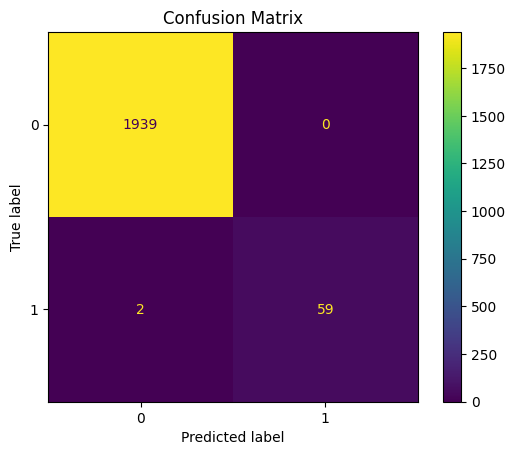

Confusion Matrix:
------------------------------
True Negatives: 1939
False Positives: 0
False Negatives: 2
True Positives: 59


In [41]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix in a readable format
print("Confusion Matrix:")
print("-" * 30)
print("True Negatives:", cm[0, 0])
print("False Positives:", cm[0, 1])
print("False Negatives:", cm[1, 0])
print("True Positives:", cm[1, 1])

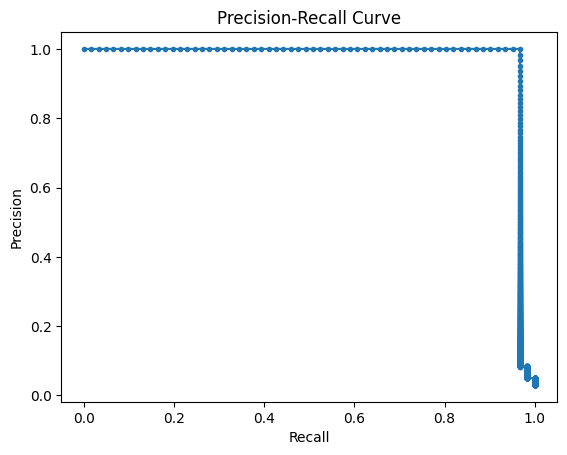

In [42]:
# Plot precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

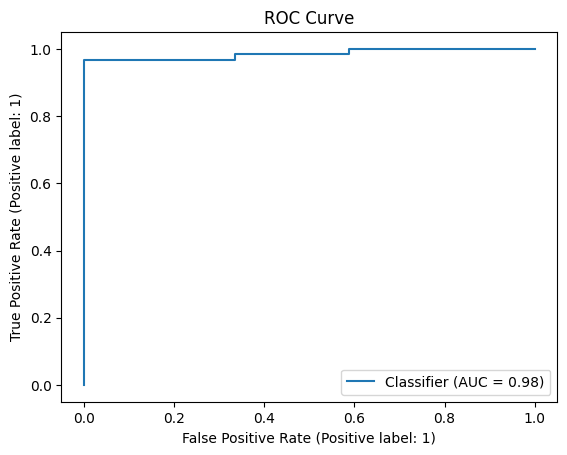

In [43]:
# Plot ROC curve
RocCurveDisplay.from_predictions(y_test, y_prob)
plt.title('ROC Curve')
plt.show()

Model logistic regression digunakan karena model ini cocok untuk masalah klasifikasi biner seperti ini (failure or no failure).

Model ini menunjukkan kinerja yang sangat baik berdasarkan evaluasi dengan accuracy 0.99 yang artinya model ini hampir selalu benar dalam memprediksi machine failure, precision 1.0 (False Positive : 0) dan recall 0.967 yang artinya model mampu mendeteksi 96.7% dari kegagalan alat yang terjadi meskipun ada beberapa kegagalan yang tidak terdeteksi (False Negative)

Selain itu, pada kurva precision-recall juga menunjukkan bahwa model ini sangat efektif karena precision yang tetap tinggi saat recall meningkat.

Dan juga dilihat dari kurva ROC dimana model yang baik akan memiliki kurva yang mendekati sudut kiri atas. Dan dengan nilai AUC yang mendekati 1 yaitu 0.98 menunjukkan bahwa model ini memiliki kinerja yang sangat baik.